In [1]:
from sklearn.datasets import load_boston

In [3]:
data = load_boston()

In [4]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [5]:
data['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [8]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data['data'], data['target'], test_size=0.2)

print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [15]:
from sklearn.preprocessing import MinMaxScaler

model = MinMaxScaler().fit(train_data)
train_data_mms = model.transform(train_data)
test_data_mms = model.transform(test_data)

In [12]:
model.min_

array([-1.76956027e-04,  0.00000000e+00, -1.68621701e-02,  0.00000000e+00,
       -7.92181070e-01, -6.82314620e-01, -2.98661174e-02, -1.02719857e-01,
       -4.34782609e-02, -3.56870229e-01, -1.34042553e+00, -8.06898986e-04,
       -4.77373068e-02])

In [20]:
from sklearn.decomposition import PCA

model = PCA(n_components=8).fit(train_data_mms)
train_data_mms = model.transform(train_data_mms)
test_data_mms = model.transform(test_data_mms)

In [24]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

data = load_iris()
model = KMeans(n_clusters=3).fit(data['data'])

In [25]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [26]:
model.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

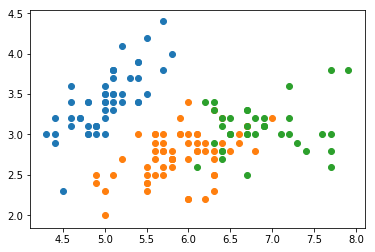

In [31]:
import matplotlib.pyplot as plt

for i in range(3):
    plt.scatter(data['data'][model.labels_ == i, 0], data['data'][model.labels_ == i, 1])
    
plt.show()

In [33]:
from sklearn.metrics import silhouette_score
fo
silhouette_score(data['data'], model.labels_)

0.5525919445213676

In [1]:
# 数据导入
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
x = data['data']
y = data['target']

In [4]:
# 划分训练集、测试集
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [18]:
# 模型预处理
from sklearn.preprocessing import StandardScaler
model = StandardScaler().fit(x_train)
x_train_ss = model.transform(x_train)
x_test_ss = model.transform(x_test)

In [24]:
# 分类模型构建
from sklearn.svm import SVC
model = SVC().fit(x_train_ss, y_train)
y_pre = model.predict(x_test_ss)

In [25]:
model.score(x_test_ss, y_test)

0.9736842105263158

In [29]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_curve
print(recall_score(y_test, y_pre))
print(precision_score(y_test, y_pre))
print(f1_score(y_test, y_pre))

1.0
0.9565217391304348
0.9777777777777777


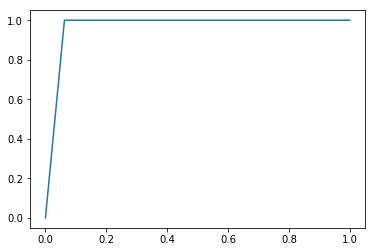

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_pre)
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show()

In [31]:
help(roc_curve)

Help on function roc_curve in module sklearn.metrics.ranking:

roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)
    Compute Receiver operating characteristic (ROC)
    
    Note: this implementation is restricted to the binary classification task.
    
    Read more in the :ref:`User Guide <roc_metrics>`.
    
    Parameters
    ----------
    
    y_true : array, shape = [n_samples]
        True binary labels in range {0, 1} or {-1, 1}.  If labels are not
        binary, pos_label should be explicitly given.
    
    y_score : array, shape = [n_samples]
        Target scores, can either be probability estimates of the positive
        class, confidence values, or non-thresholded measure of decisions
        (as returned by "decision_function" on some classifiers).
    
    pos_label : int or str, default=None
        Label considered as positive and others are considered negative.
    
    sample_weight : array-like of shape = [n_samples], optiona

In [35]:
from sklearn.datasets import load_boston
data = load_boston()
x = data['data']
y = data['target']

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)

In [42]:
y_pre = model.predict(x_test)

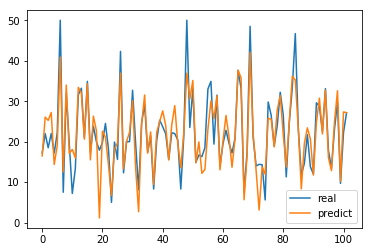

In [45]:
import matplotlib.pyplot as plt
plt.plot(range(len(y_test)), y_test)
plt.plot(range(len(y_pre)), y_pre)
plt.legend(['real', 'predict'])
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_true=y_test, y_pred=y_pre)
r2_score(y_true=y_test, y_pred=y_pre)

0.7752573895354288